<a href="https://colab.research.google.com/github/Marwenboughanmi/Final-project/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files = os.listdir('/content/drive/MyDrive/Final-project/Normal/images')

In [ ]:
# read in the dataframe of images paths and labels
df = pd.read_csv('/content/drive/MyDrive/Final-project/merged_image_data.csv')
df.head()

,image_path,label
0,./Normal/images/Normal-6196.png,Normal-6196.png
1,./Normal/images/Normal-7288.png,Normal-7288.png
2,./Normal/images/Normal-1821.png,Normal-1821.png
3,./Normal/images/Normal-4781.png,Normal-4781.png
4,./Normal/images/Normal-4959.png,Normal-4959.png


In [ ]:
# make sure the dataframe doesn't include any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  21165 non-null  object
 1   label       21165 non-null  object
dtypes: object(2)
memory usage: 330.8+ KB


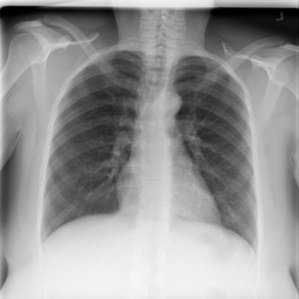

In [ ]:
# open an image using it's path
base_path = '/content/drive/MyDrive/Colab_Notebooks/Final-project/'
file_path = df.iloc[0,0]

path = base_path + file_path
path= path.replace('./', '')
# print(path)
Image.open(path)

In [ ]:
# build a list of imported images using the "image_path" column of the imported df

base_path = '/content/drive/MyDrive/Colab_Notebooks/Final-project/'
images = []
for i in range(len(df)):
    file_path = df.iloc[i,0]
    path = base_path + file_path
    path= path.replace('./', '')
    print(f'{i} of {len(df)}: Attempting to import {file_path}')
    try:
        images.append(Image.open(path))
    except:
        print(f'FAILED: {file_path}')

Streaming output truncated to the last 5000 lines.
16165 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-986.png
16166 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-5471.png
16167 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-3000.png
16168 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-3766.png
16169 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-4009.png
16170 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-5317.png
16171 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-2478.png
16172 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-1171.png
16173 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-3955.png
16174 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-2493.png
16175 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-4784.png
16176 of 21165: Attempting to import ./Lung_Opacity/images/

In [ ]:
# check the length of the list to make sure everything has been added
len(images)

21165

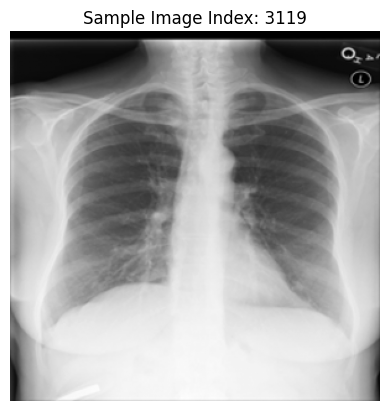

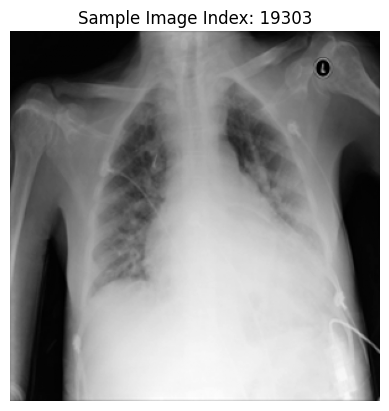

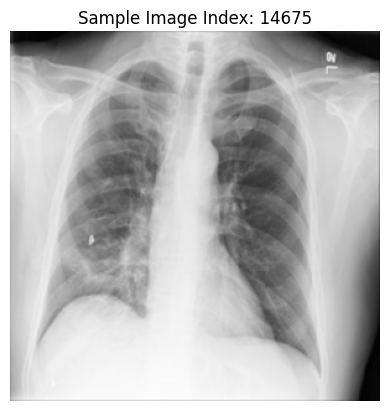

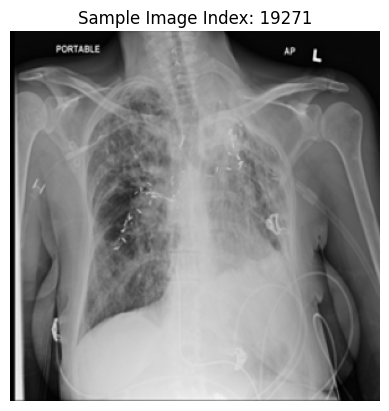

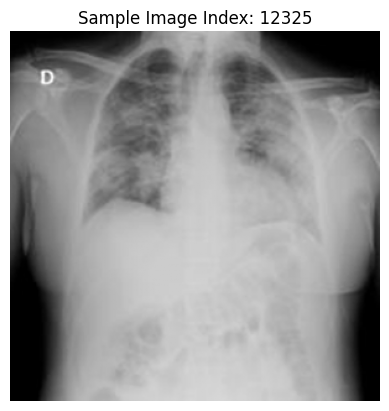

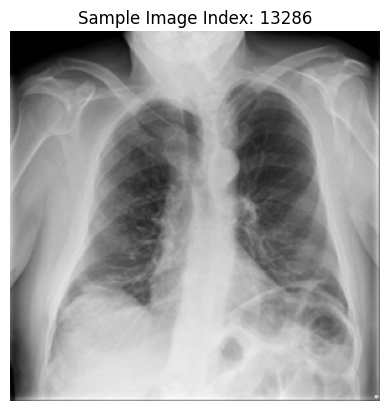

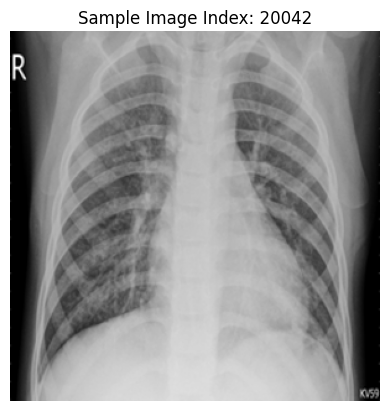

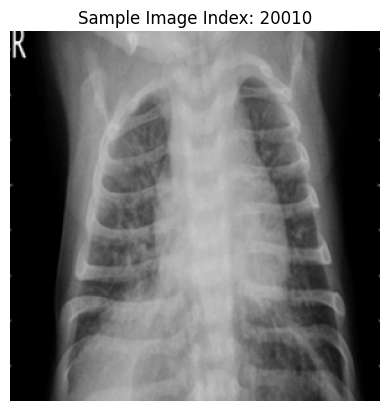

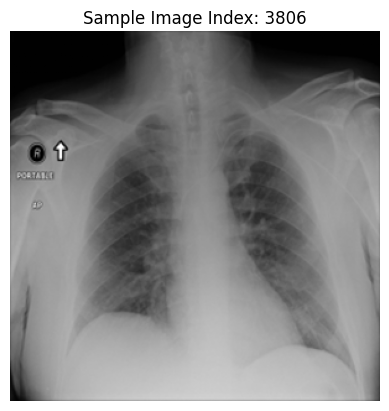

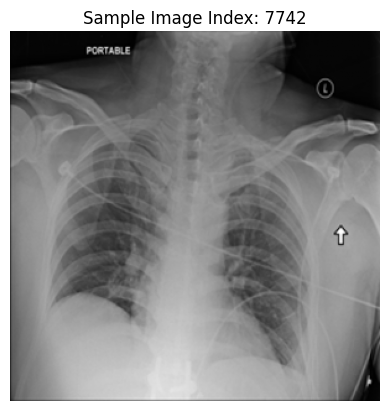

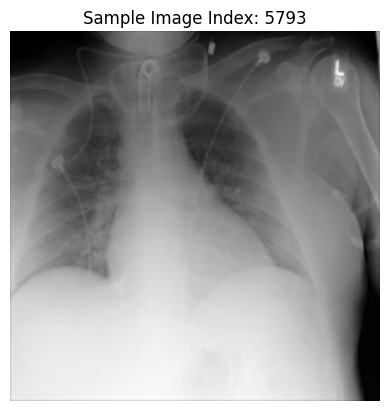

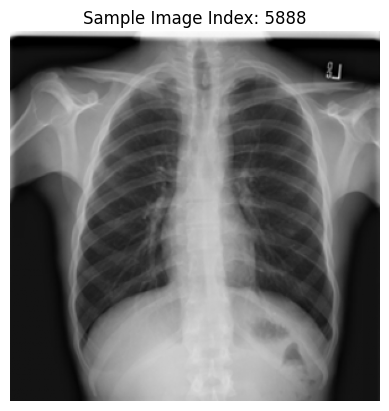

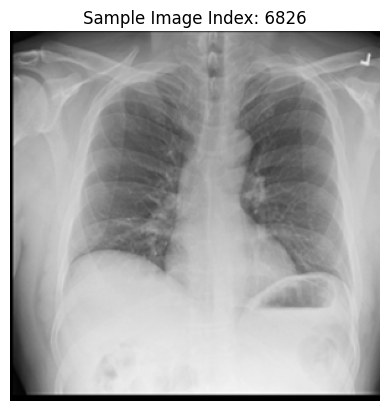

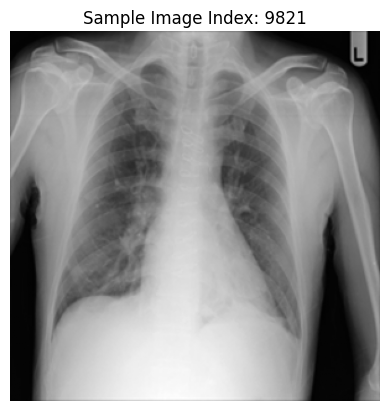

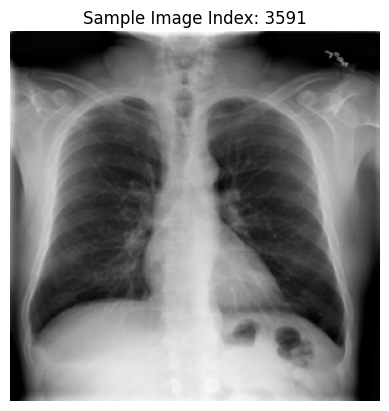

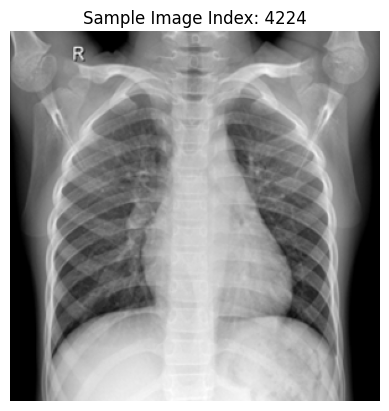

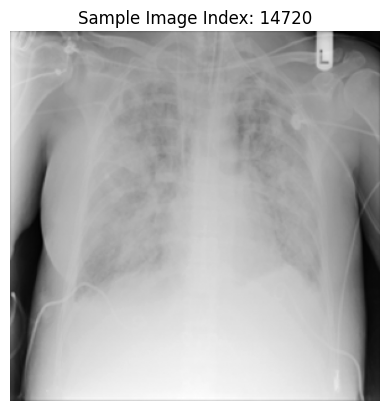

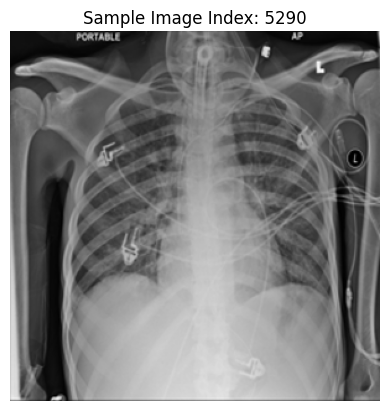

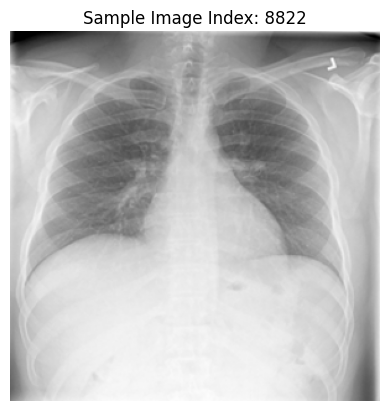

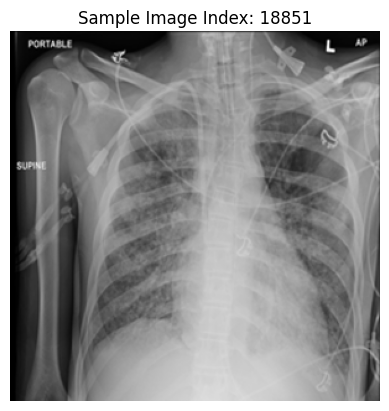

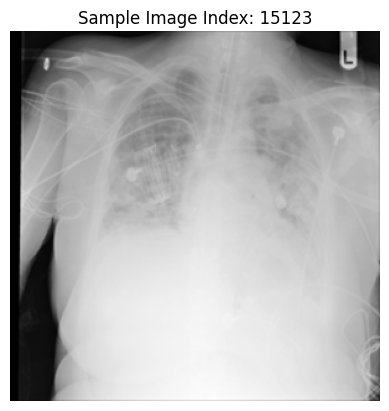

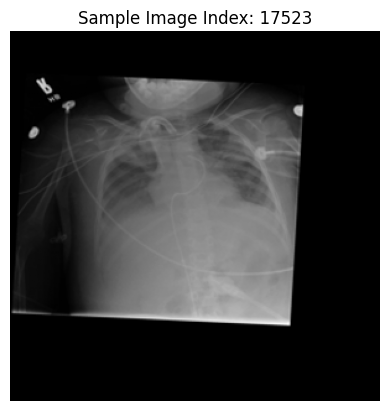

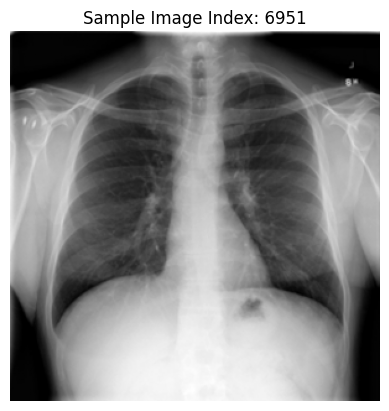

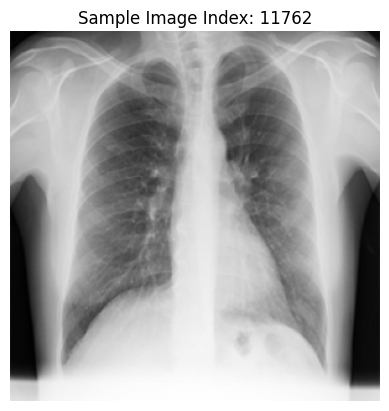

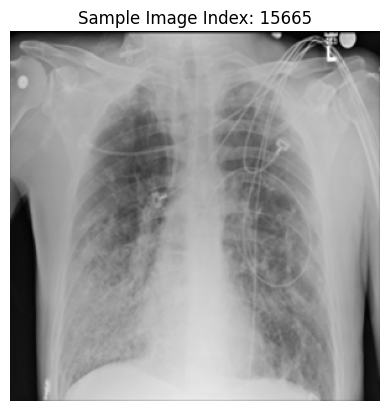

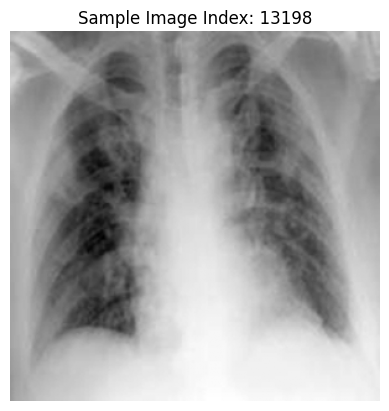

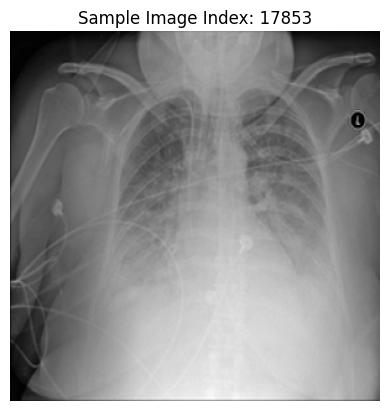

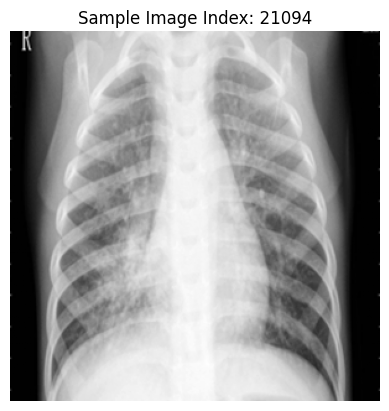

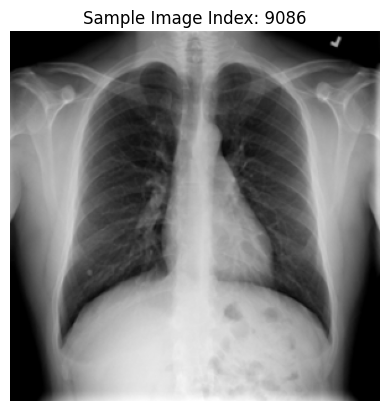

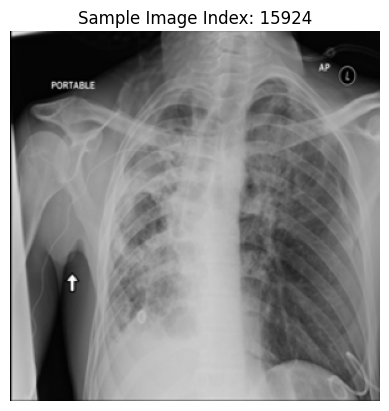

In [ ]:
# look at 30 random images in the images list
# create a list of 30 random numbers 0 length of the images list
sample_img_index = [np.random.randint(0,len(images)) for i in range(30)]

# # for each number in the sample_img_index, show the sample image
import matplotlib.pyplot as plt

for i in sample_img_index:
    plt.imshow(images[i], cmap= 'gray')
    plt.title(f"Sample Image Index: {i}")
    plt.axis('off')  # Turn off axes for a cleaner display
    plt.show()

In [ ]:

# Open a new file named 'img.pkl' with write permission
with open('/content/drive/My Drive/Colab_Notebooks/Final-project/img.pkl', 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(images, file)

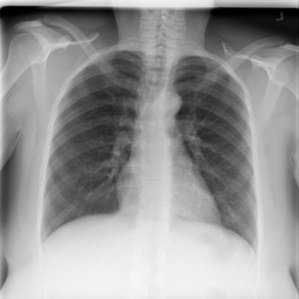

In [ ]:
# Load the images from the pkl file
with open('/content/drive/My Drive/Colab_Notebooks/Final-project/img.pkl', 'rb') as file:
    images = pickle.load(file)

images[0]

In [ ]:
# Get all the sizes into a list, then convert to a set
sizes = set([image.size for image in images])
sizes

{(299, 299)}

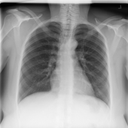

In [ ]:
# training the model with images with the dimensions 299 x 299 takes too much computational resources
# loop through the list of images and resize each image to 128 x 128 so we can still retain most of the information while keeping the model efficient
target_size = (128, 128)

resized_images = [img.resize(target_size, resample = Image.LANCZOS) for img in images]
resized_images[0]

In [ ]:
# get the shape of images into a list, then convert to a set
shape = set([np.array(img).shape for i, img in enumerate(resized_images)])
shape

{(128, 128), (128, 128, 3)}

In [ ]:
# let's get the index of the images with the shape (128, 128, 3)
index_list = [i for i, img in enumerate(resized_images) if np.array(img).shape == (128, 128, 3)]
print(index_list)
len(index_list)

[19820, 19823, 19836, 19850, 19881, 19890, 19899, 19908, 19914, 19922, 19924, 19942, 19945, 19958, 19960, 19967, 19982, 19990, 19996, 20000, 20001, 20004, 20023, 20028, 20029, 20059, 20061, 20063, 20083, 20097, 20105, 20109, 20114, 20132, 20148, 20159, 20181, 20193, 20199, 20209, 20234, 20250, 20260, 20281, 20283, 20309, 20357, 20391, 20435, 20441, 20463, 20471, 20480, 20488, 20509, 20510, 20517, 20546, 20547, 20553, 20570, 20579, 20584, 20589, 20599, 20617, 20634, 20667, 20674, 20676, 20684, 20690, 20694, 20712, 20729, 20758, 20765, 20811, 20813, 20823, 20837, 20839, 20852, 20855, 20859, 20871, 20877, 20878, 20880, 20882, 20886, 20887, 20891, 20899, 20901, 20903, 20904, 20915, 20918, 20927, 20932, 20935, 20948, 20949, 20956, 20963, 20979, 20983, 20985, 20993, 20997, 21003, 21010, 21011, 21016, 21018, 21023, 21029, 21041, 21049, 21050, 21052, 21057, 21063, 21069, 21076, 21079, 21081, 21083, 21086, 21098, 21100, 21103, 21122, 21126, 21129, 21130, 21144, 21154, 21158]


140

In [ ]:
# let's look at where these images are in the data frame
colored_images_df = df.iloc[index_list]
colored_images_df.head(15)

,image_path,label
19820,./Viral_Pneumonia/images/Viral Pneumonia-770.png,Viral Pneumonia-770.png
19823,./Viral_Pneumonia/images/Viral Pneumonia-764.png,Viral Pneumonia-764.png
19836,./Viral_Pneumonia/images/Viral Pneumonia-228.png,Viral Pneumonia-228.png
19850,./Viral_Pneumonia/images/Viral Pneumonia-610.png,Viral Pneumonia-610.png
19881,./Viral_Pneumonia/images/Viral Pneumonia-201.png,Viral Pneumonia-201.png
19890,./Viral_Pneumonia/images/Viral Pneumonia-981.png,Viral Pneumonia-981.png
19899,./Viral_Pneumonia/images/Viral Pneumonia-773.png,Viral Pneumonia-773.png
19908,./Viral_Pneumonia/images/Viral Pneumonia-203.png,Viral Pneumonia-203.png
19914,./Viral_Pneumonia/images/Viral Pneumonia-377.png,Viral Pneumonia-377.png
19922,./Viral_Pneumonia/images/Viral Pneumonia-388.png,Viral Pneumonia-388.png


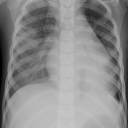

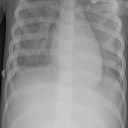

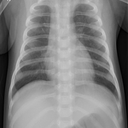

[[[126. 126. 126.]
  [127. 127. 127.]
  [128. 128. 128.]
  ...
  [ 88.  88.  88.]
  [ 87.  87.  87.]
  [ 91.  91.  91.]]

 [[126. 126. 126.]
  [125. 125. 125.]
  [126. 126. 126.]
  ...
  [ 84.  84.  84.]
  [ 90.  90.  90.]
  [ 91.  91.  91.]]

 [[125. 125. 125.]
  [126. 126. 126.]
  [112. 112. 112.]
  ...
  [ 72.  72.  72.]
  [ 81.  81.  81.]
  [ 83.  83.  83.]]

 ...

 [[ 26.  26.  26.]
  [ 59.  59.  59.]
  [ 85.  85.  85.]
  ...
  [124. 124. 124.]
  [ 98.  98.  98.]
  [ 52.  52.  52.]]

 [[ 28.  28.  28.]
  [ 62.  62.  62.]
  [ 84.  84.  84.]
  ...
  [122. 122. 122.]
  [ 94.  94.  94.]
  [ 57.  57.  57.]]

 [[ 29.  29.  29.]
  [ 63.  63.  63.]
  [ 87.  87.  87.]
  ...
  [117. 117. 117.]
  [ 90.  90.  90.]
  [ 60.  60.  60.]]]


In [ ]:
# hmmm interesting, it seems like  140 of the x-ray images in the viral pneumonia dataset were saved in the format of colored images
# let's take a closer look at a few

display(resized_images[19820])
display(resized_images[20001])
display(resized_images[20891])
# let's look at the array version of these images
# each pixel has three colored channels representing RGB, but the values are all the same within one pixel which is why teh image looks like a grayscaled image
print(np.array(resized_images[19820]).astype(np.float32))

In [ ]:

# let's convert all the images into grayscale
grayscaled_images = [img.convert('L') for img in resized_images]
np.array(grayscaled_images[19820]).shape

(128, 128)

In [ ]:
# since all the images are the same size, we won't need to resize them
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in grayscaled_images]

# Display the pixel values of the first image
print("Pixel Values:")
print(float_images[0])

Pixel Values:
[[240. 234. 227. ... 211. 216. 211.]
 [221. 217. 211. ... 189. 196. 192.]
 [180. 132. 106. ... 164. 173. 173.]
 ...
 [206. 200. 203. ... 193. 193. 174.]
 [214. 206. 207. ... 195. 197. 192.]
 [219. 210. 210. ... 197. 199. 197.]]


In [ ]:
# To normalize images to a range between 0 and 1,
# we need to divide all pixel values by the max of 255

normalized_images = [image/255 for image in float_images]

# Display the pixel values of the first image
print("Pixel Values:")
print(normalized_images[0])

Pixel Values:
[[0.9411765  0.91764706 0.8901961  ... 0.827451   0.84705883 0.827451  ]
 [0.8666667  0.8509804  0.827451   ... 0.7411765  0.76862746 0.7529412 ]
 [0.7058824  0.5176471  0.41568628 ... 0.6431373  0.6784314  0.6784314 ]
 ...
 [0.80784315 0.78431374 0.79607844 ... 0.75686276 0.75686276 0.68235296]
 [0.8392157  0.80784315 0.8117647  ... 0.7647059  0.77254903 0.7529412 ]
 [0.85882354 0.8235294  0.8235294  ... 0.77254903 0.78039217 0.77254903]]


In [ ]:
# Open a new file named 'img_preprocessed.pkl' with write permission
with open('/content/drive/MyDrive/Colab_Notebooks/Final-project/img_preprocessed.pkl', 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(normalized_images, file)

In [ ]:
# Load the images from the img_preprocessed.pkl file
with open('/content/drive/MyDrive/Colab_Notebooks/Final-project/img_preprocessed.pkl', 'rb') as file:
    normalized_images = pickle.load(file)

normalized_images[0]

array([[0.9411765 , 0.91764706, 0.8901961 , ..., 0.827451  , 0.84705883,
        0.827451  ],
       [0.8666667 , 0.8509804 , 0.827451  , ..., 0.7411765 , 0.76862746,
        0.7529412 ],
       [0.7058824 , 0.5176471 , 0.41568628, ..., 0.6431373 , 0.6784314 ,
        0.6784314 ],
       ...,
       [0.80784315, 0.78431374, 0.79607844, ..., 0.75686276, 0.75686276,
        0.68235296],
       [0.8392157 , 0.80784315, 0.8117647 , ..., 0.7647059 , 0.77254903,
        0.7529412 ],
       [0.85882354, 0.8235294 , 0.8235294 , ..., 0.77254903, 0.78039217,
        0.77254903]], dtype=float32)

In [ ]:
#check the length of the read in normalized images to make sure they have been processed correctly
print(len(normalized_images))


21165


In [ ]:
# get the shape of images into a list, then convert to a set
shape = set([np.array(img).shape for i, img in enumerate(normalized_images)])
shape

{(128, 128)}